## Daten schreiben, lesen und darstellen

**Daten schreiben**

Die Funktion *mfile=open(file,'w')* legt eine Datei mit Namen *file* an und öffnet sie im Schreibmodus (*w*). Der Name kann auch den kompletten Dateipfad beinhalten. 

Der Modus  *w* überschreibt eine bereits vorhandene Datei. Andere Modi sind
- *r*: Für das Lesen der Datei.
- *a*: Für das Anhängen von Inhalten an die Datei.
- *w*: Löscht zunächst den Inhalt und ergänzt dann alle weiteren Inhalte.

    
Nach Beendigung des Schreibvorgangs wird das Objekt mit Hilfe einer Methode wieder geschlossen: *mfile.close()*.

In [3]:
pfad = r"C:\Users\priwitze\Documents\Informatik\Python\Notebooks" #angepassten Pfad wählen
wfile=open(pfad+r"\test.csv",'w')
wfile.write(f"Fach, Note\n")
wfile.write(f"Informatik, 2.1\n")
wfile.close()

**Daten lesen**

Hierfür wird ein Objekt im Lesemodus angelegt und kann dann mit der Methode *read()* bzw. *readline()* (zeilenweise) gelesen werden:

In [4]:
rfile=open(pfad+r"\test.csv",'r')
print(rfile.read()) 
rfile.close()
rfile=open(pfad+r"\test.csv",'r')
print(rfile.readline()) 

Fach, Note
Informatik, 2.1

Fach, Note



**Dateien lesen mit Pandas**

Eine csv-Datei lässt sich mit Hilfe des Packages Pandas einlesen und wird dann im Datenformat *DataFrame* abgespeichert. Dann kann auf einzelne Element, Zeilen oder Spalten zugegriffen werden ähnlich wie bei Arrays. Alternativ können auch Spaltenbezeichnungen genutzt werden.


Die Funktion *read_csv()* liest csv-Dateien ein, bei denen die Spalten durch Komma getrennt sind und Dezimalpunkte verwendet werden.


In [6]:
import pandas as pd                     # Package importierem
students = pd.read_csv('survey.csv')    # Daten ienlesen
#print(students)                        # Überblick über die Daten
#print(students.iloc[5,8])              # ein Element: Zeile mit Index 5, Spalte mit Index 8
#print(students['W.Hnd'])               # eine ganze Spalte mit Spaltennamen
print(students.Clap)                    # eine ganze Spalte mit Spaltennamen (alternativ)
print(students.iloc[4,:])               # eine ganze Zeile
print(students.shape)                   # gibt die Anzahl der Zeilen und Spalten an


0         Left
1         Left
2      Neither
3      Neither
4        Right
        ...   
232      Right
233      Right
234      Right
235      Right
236      Right
Name: Clap, Length: 237, dtype: object
rownames          5
Sex            Male
Wr.Hnd         20.0
NW.Hnd         20.0
W.Hnd         Right
Fold        Neither
Pulse          35.0
Clap          Right
Exer           Some
Smoke         Never
Height        165.0
M.I          Metric
Age          23.667
Name: 4, dtype: object
(237, 13)


Information zu den Daten:

- Sex: Geschlecht (Werte "Male", "Female")
- Wr.Hnd: Spanne (in cm) der Schreibhand vom Daumen bis zum kleinen Finger
- NW.Hnd: Spanne der anderen Hand
- W.Hnd: Schreibhand (Werte "Left", "Right")
- Fold: "Verschränke die Arme! Welcher ist oben?" (Werte "R on L", "L on R", "Neither".)
- Pulse: Puls in Schläge pro Minute
- Clap: "Klatsch in die Hände! Welche Hand ist oben?" (Werte "Right", "Left", "Neither")
- Exer: Wie of machen die Studierenden Sport? (Werte "Freq" (frequently), "Some", "None".)
- Smoke: Wie stark rauchen die Studierenden? (Werte "Heavy", "Regul" (regularly), "Occas" (occasionally), "Never")
- Height: Größe der Studierenden in cm
- M.I: ob die Studierenden ihre Größe in imperialen (Fuß/Zoll) oder metrischen (Zentimeter/Meter) Einheiten angegeben haben. (Werte "Metric", "Imperial")
- Age: Alter der Studierenden in Jahren


**Daten-Slicing**

Daten-Slicing ist die Technik des Extrahierens oder Auswählens bestimmter Teile von Daten (Tabellen). Dabei werden typischerweise Zeilen oder Spalten, gegebenenfalls mit bestimmten Werten, ausgewählt.

- Auswählen von Zeilen: Mit *myData.iloc[k:l,:]*;  erhalten Sie die Zeilen k bis ausschließlich Zeile l.
- Auswählen von Spalten: Entweder über Indizes analog zum obigen Beispiel oder über Namen *myData[[meineSpalte1,meineSpalte2,\dots, meineSpalteN]]*
- Beides lässt sich auch kombinieren zu Auswahl von Spalten und Zeilen: *myData[[meineSpalte1,meineSpalte2,\dots, meineSpalteN]]..iloc[k:l,:]*
- Filtern - Auswahl von Daten über den Wert für eine bestimmte  Spalte: *gefilterteDaten=myData.meineSpalte=='meinWert'


In [7]:
#print(students.iloc[5:12,:])                # Zeilen 5 bis 12 (ausschließlich) 
#print(students[['W.Hnd','Fold','Clap']])    # drei Spalten über Namen ausgewählt
#print(students[['W.Hnd','Fold','Clap']].iloc[5:12,:]) # Kombination
female = students[students.Sex=='Female']             # Filtern nach bestimmtem Wert
#print(female)
# Kombination: Maße beide Hände für alle linkshändigen Studentinnen 
female_lefthanded = female[female['W.Hnd'] == 'Left'][['Wr.Hnd','NW.Hnd']]
print('Im Datensatz sind %d linkshändige Studentinnen.'%female_lefthanded.shape[0])
#print(female_lefthanded)

Im Datensatz sind 7 linkshändige Studentinnen.


**Aufgabe**

Wie viele Studierende unter 25 machen häufig Sport?

**Graphik mit Python: Die Matplotlib Bibliothek**

Die *pylab*-Schnittstelle ist  die zur Verfügung gestellte Menge an Funktionen, die es Nutzerinnen und Nutzern ermöglichen, Plots mit einem höhersprachigen Code zu erstellen.

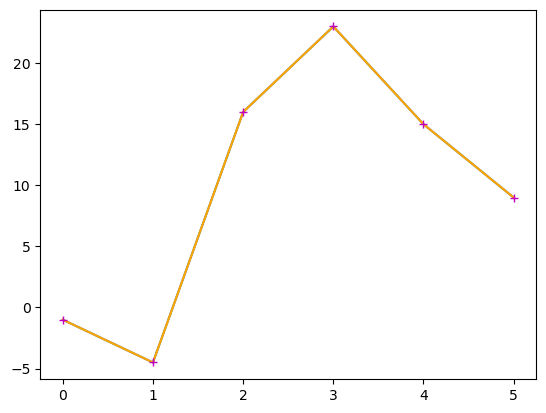

In [2]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23, 15, 9])
plt.plot([-1, -4.5, 16, 23, 15, 9], 'orange')
plt.plot([-1, -4.5, 16, 23, 15, 9], '+m')
plt.show()

Für den Titel von Graphiken, Bezeichnung der Achsen Legenden usw. existieren jeweils eigene Befehle. 

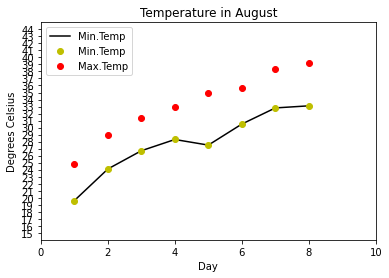

In [10]:
# Daten 
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]

plt.xlabel('Day') # Bezeichnung der x-Achse
plt.ylabel('Degrees Celsius') # Bezeichnung der y-Achse

plt.title('Temperature in August') # Titel

plt.plot(days, celsius_min, 'k',days, celsius_min, "oy", days, celsius_max, "or") 
# Daten plotten

plt.legend(['Min.Temp','Min.Temp', 'Max.Temp'],loc='upper left') 
# Legende, in der Reihenfolge wie gezeichnet wurde

xmin, xmax, ymin, ymax = 0, 10, 14, 45 
plt.axis([xmin, xmax, ymin, ymax]) 
# Maximal und Minimalwerte für x- und y-Achse festlegen

import numpy as np #numerical python
plt.yticks(np.arange(15,45, step=1)) 
#festlegen, welche Teilstriche auf der y-Achse gekennzeichnet werden

plt.show()

**Graphen von Funktionen**

Hier nutzen wir das Package *numpy* für Mathematik und Numerik.  Für Graphen von Funktionen wird zum einen der Definitionsbereich durch viele $x$-Werte repräsentiert. Dazu wir das Intervall $[a,b]$ mit Hilfe von *np.linspace(a,b,n)* in $n$ Punkte mit gleichem Abstand zerlegt. Der erste Punkt ist $a$, der letzte $b$. Ohne Angabe von $n$, also *np.linspace(a,b)* erzeugt Python 50 Punkte. Dann werden $y$-Werte durch die Anwendung von mathematischen Funktionen auf die $x$-Werte berechnet und das Ganze als Liniendiagramm mit *plt.plot(x,y)* dargestellt.


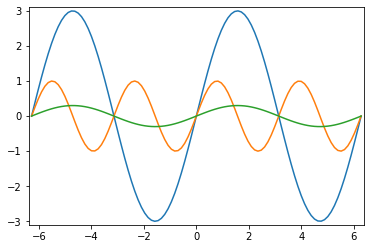

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2 * np.pi, 2 * np.pi,100) #x-Werte

# drei verschiedene Funktionen
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)

startx, endx = -2 * np.pi - 0.1, 2*np.pi + 0.1
starty, endy = -3.1, 3.1

# alle Graphen in dasselbe Graphikfenster
plt.axis([startx, endx, starty, endy])
plt.plot(X,F1)
plt.plot(X,F2)
plt.plot(X,F3)
plt.show()

**Management von Graphikfenstern**

Die unten stehenden Befehle öffnen und schließen Graphikfenster.

In [ ]:
plt.figure() #ein leeres Graphikfenster wird erzeugt

plt.show()	#zeigt die Graphik an; 
            #nur notwendig in nicht-interaktivem Modus

plt.close() #schliesst das aktuelle Graphikfenster
plt.close('all') #schliesst alle Graphikfenster


fig, ax = plt.subplots() #erzeugt ein Graphikfenster 
                        #und ein Koordinatensystem
# laut Matplotlib: This is actually the simplest and
# recommended way of creating a single Figure and Axes.


**Mehrere Diagramme in einem Graphikfenster**

Das Graphikfenster (*figure*) lässt sich in mehrere Diagrammflächen (*axes*) unterteilen. Unten sehen Sie, wie die verschiedenen Diagramme gezeichnet werden.

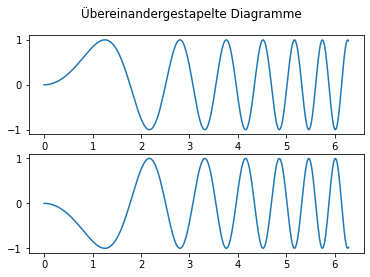

In [4]:
# Daten: Sinuskurve
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Zwei Diagramme übereinander - Variante 1
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Übereinandergestapelte Diagramme') # Titel für figure
ax1.plot(x, y)
ax2.plot(x, -y)
plt.show()



In [ ]:

# Zwei Diagramme übereinander - Variante 2
fig, axs = plt.subplots(2)
fig.suptitle('Übereinandergestapelte Diagramme')

axs[0].plot(x, y)
axs[0].set_title('Diagramm 1') # Titel für axs[0] 

axs[1].plot(x, -y)
axs[1].set_title('Diagramm 2') # Titel für axs[1]

plt.tight_layout() # damit Titel und Achsenbeschriftung nicht überlappen
plt.show()

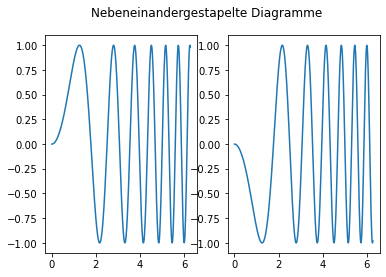

In [11]:
# Zwei Diagramme nebeneinander 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Nebeneinandergestapelte Diagramme')
ax1.plot(x, y)
ax2.plot(x, -y)
plt.show()

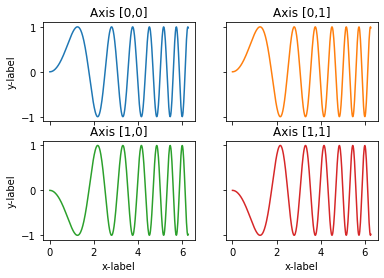

In [13]:
# Vier Diagramme in einem Fenster: 2 x 2
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

# Achsenbezeichnungen 
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Achsenbezeichnungen nur außen
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

**Aufgabe**

Unterteilen Sie ein Graphikfenster in 2 Zeilen und 3 Spalten und zeichnen Sie folgende Funktionen in die einzelnen Diagramme für $x\in [-2,2]$:

1. $\ln(4x^2 + 1)$
2. $\frac{1}{10}(e^x+e^{-x})$
3. $\tan(x)$
4. $2^{-x^2}$
5. $x\cos(4x)$
6. $x^2\sin(\frac{10}{x})$



**Farben und Linien**

Python verfügt über Farbbezeichnungen durch Namen. RGB oder RGBA (Rot,Grün,Blau,$\alpha$) werden als Tupel vonDezimalzahlen aus $[0, 1]$ angegeben:  (0.1, 0.2, 0.5) oder (0.1, 0.2, 0.5, 0.3).

Grau-Werte sind durch eine Zahl aus $[0,1]$ im String-Format gekennzeichnet.

Es gibt auch weitere Colormaps, die zusätzlich geladen werden können, z.B. *cmap = 'plasma'*.

Linienart (*linestyle*) und Dicke (*linewidth*) können geändert werden.


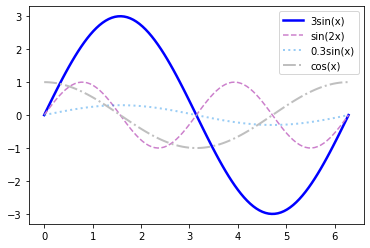

In [14]:
X = np.linspace(0, 2 * np.pi, 100)

F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
F4 = np.cos(X)

plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-",label='3sin(x)')
plt.plot(X, F2, color=(0.8,0.5,0.8), linewidth=1.5, linestyle="--",label='sin(2x)')
plt.plot(X, F3, color=(0,0.5,0.9,0.4), linewidth=2, linestyle=":",label='0.3sin(x)')
plt.plot(X, F4, color='0.75', linewidth=2, linestyle="-.",label='cos(x)')

plt.legend()
plt.show()

**Punktmarker**

Punkte können mit verschiedenen Symbolen eingezeichnet werden. Sie kennen bereits *'o'*, wodurch ein gefüllter Punkt entsteht. Eine Liste der mögliche Punktmarker finden Sie unter https://matplotlib.org/3.1.1/api/markers_api.html.

Auch die Größe der Punktmarker kann festgelegt werden.

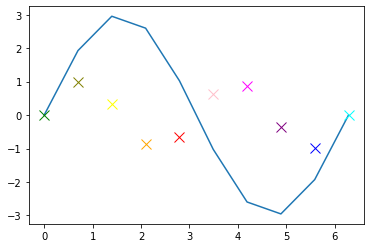

In [16]:
import numpy as np
import matplotlib.pyplot as plt

color = ['green','olive','yellow','orange','red','pink','magenta','purple','blue','cyan']
marker = ['x','o','*','+','.','H','>','d','s','p']

X = np.linspace(0, 2 * np.pi, 10, endpoint=True)

F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
plt.plot(X, F1)#, 'ro', markersize=5)
for i,c,m in zip(range(10),color,marker):
       plt.plot(X[i], F2[i],marker=m ,c=c)#,markersize=10)
plt.show()

**Aufgabe**

Zeichnen Sie den Graphen der Funktion $t=g_a(s)=-\frac{1}{2a}s^4+s^2+\frac32 a$ mit Parameter $a>0$ für die Werte $a=3$, $a=4$ und $a=5$ im Bereich von $[-a,a]$. Färben Sie die Funktionsgraphen unterschiedlich. Ändern Sie Linienart und -dicke für jeden Graphen.  Ergänzen Sie die Graphik durch Legende, Titel und Achsenbezeichnungen. Zeichnen Sie zusätzlich die Punkte $(\sqrt{\frac a3},\frac{16}{9}a)$ und $(-\sqrt{\frac a3},\frac{16}{9}a)$ durch auffallende Marker ein.

**Flächen färben**

Die Methode *fill\_between(x,y1,y2)* hat drei Argumente, welche die Grenzen der auszufüllenden Fläche angeben: die $x$-Werte und $y$-Werte von zwei Kurven. Die Fläche dazwischen wird eingefärbt in der angegebenen Farbe.

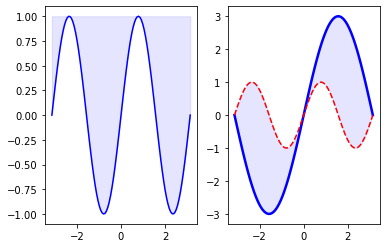

In [4]:
fig, (ax, ax1) = plt.subplots(1, 2)

n = 100
X = np.linspace(-np.pi,np.pi,n)
Y = np.sin(2*X)

ax.plot (X, Y, color="blue", alpha=1.00)
ax.fill_between(X, Y, 1, color="blue", alpha=.1)

F1 = 3 * np.sin(X)
F2 = np.sin(2*X)

ax1.plot(X, F1, color="blue", linewidth=2.5, linestyle="-")
ax1.plot(X, F2, color="red", linewidth=1.5, linestyle="--")
ax1.fill_between(X, F1, F2, color="blue", alpha=.1)

**Aufgabe**

Zeichnen Sie mit Python die Fläche zwischen zwei Funktionen:

 $f(x)=\sqrt{x};\quad g(x)=x^3$ für $x\in[0,1]$; 

Die Fläche soll mit einer Farbe eingefärbt werden, der Rand der Fläche soll fett gezeichnet werden, und der weitere Funktionsverlauf für $x\in[1,1.5]$, der nicht an die Fläche grenzt, gestrichelt.

**Darstellung von Daten**

Bei der Darstellung von Daten ist es wichtig, den Datentyp zu unterscheiden.

- *Nominale Daten*: z.B. Name, Wohnort oder Studienfach. Die Häufigkeit nominaler Daten wird in der Regel durch ein Tortendiagramm, manchmal auch durch ein Stabdiagramm dargestellt.
- *Ordinale Daten*: z.B. Schmerzausprägung (keine, mäßig, stark, sehr stark) oder Zensuren (sehr gut, gut, befriedigend, ausreichend, ungenügend). Die Häufigkeit ordinaler Daten wird in der Regel durch ein Stabdiagramm, manchmal auch durch ein Tortendiagramm dargestellt.
- *Diskrete Daten*: z.B. Anzahl Geschwister, Fachsemester. Die Häufigkeit diskreter Daten wird genau wie die ordinaler Daten in der Regel durch ein Balkendiagramm, manchmal auch durch ein Tortendiagramm dargestellt.
- *Kontinuierliche Daten*: z.B. Körpergröße, Temperatur. Kontinuierliche Daten werden in Klassen eingeteilt und die Klassenhäufigkeit wird durch ein Histogramm dargestellt. 


([<matplotlib.patches.Wedge at 0x26adc68e7f0>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Äpfel'),
  Text(-1.0692078698314704, 0.5447885196022856, 'Birnen'),
  Text(0.33991877217145827, -1.046162142464278, 'Bananen'),
  Text(0.9801071555669031, 0.49938959100741653, 'Trauben')])

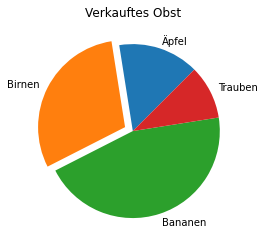

In [7]:
# Tortendiagramm für nominale Daten
mylabels = 'Äpfel', 'Birnen', 'Bananen', 'Trauben' 
#nominale Bezeichnungen
sizes = [15, 30, 45, 10] # Häufigkeit von 100
myexplode = (0, 0.1, 0, 0)  # "explodiere" das zweite Tortenstück

fig, ax = plt.subplots()
ax.set_title('Verkauftes Obst')
ax.pie(sizes, explode=myexplode, labels=mylabels,  startangle=45)


Text(0.5, 1.0, 'Zensuren')

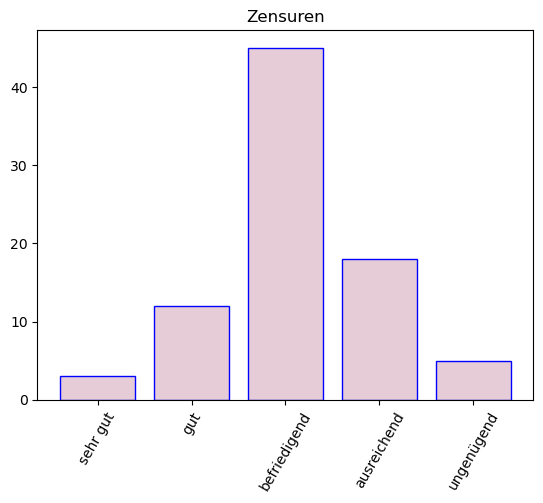

In [5]:
# Stabdiagramm für ordinale Daten 
import numpy as np
hfgkt = [3, 12, 45, 18, 5] #Häufigkeit
labels = ('sehr gut', 'gut', 'befriedigend',
 'ausreichend', 'ungenügend') #Bezeichnungen
x = np.arange(len(labels)) #Anzahl x-Werte
plt.figure()

plt.bar(x,hfgkt,color=(0.5, 0, 0.2, 0.2),  edgecolor='blue') #Balkendiagramm

plt.xticks(x,labels,rotation=60) #Bezeichnungen x-Werte, Drehung aus der Waagrechten um 60°
plt.title('Zensuren')

Text(0.5, 1.0, 'Anzahl Geschwister')

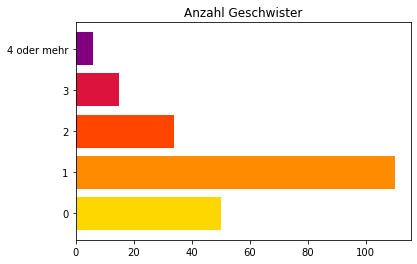

In [16]:
# Stabdiagramm für diskrete Daten 
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS) #für mehr Farben


hfgkt = [50,110,34,15,6] #Häufigkeit
labels=['0','1','2','3','4 oder mehr'] #Bezeichnungen
plt.figure() 
plt.barh(labels, hfgkt,color=['gold', 'darkorange', 'orangered', 'crimson', 'purple'] )  #horizontales Balkendiagramm
plt.title('Anzahl Geschwister')

Text(0.5, 1.0, 'Histogramm für IQ: $\\mu=100$, $\\sigma=15$')

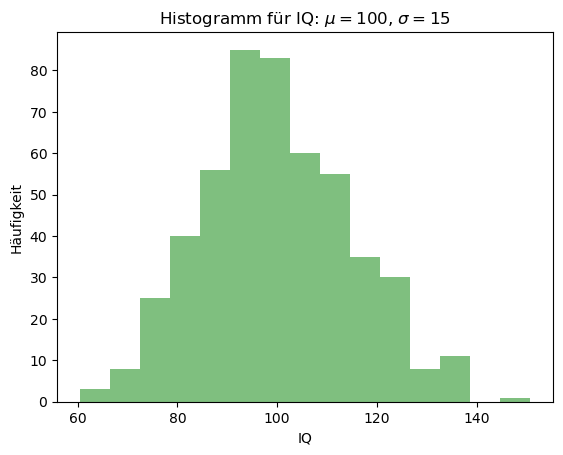

In [7]:
# Histogramm für kontinuierliche Daten
mu = 100  # Mittelwert
sigma = 15  # Standardabweichung

x = mu + sigma * np.random.randn(500) 
#500 zufällig erzeugte Werte
num_bins = 15 #Anzahl Klassen

fig, ax = plt.subplots()
 
ax.hist(x, num_bins,color='green',alpha=0.5) #Histogramm
ax.set_xlabel('IQ')
ax.set_ylabel('Häufigkeit')
ax.set_title('Histogramm für IQ: $\mu=100$, $\sigma=15$')

**Aufgabe**

Erstellen Sie für die Daten *students* die folgenden Graphiken:
- ein Tortendiagramm für die Werte von Clap
- ein Säulendiagramm für die Werte von W.Hnd 
- eine Histogramm für die Werte von Height